In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Working with Text Data in scikit-learn

## Agenda

1. Decision Tree with sklearn
2. Load and process text data
3. Decision Tree for text classification
4. LSA with Decision Tree
4. Enseble Learning for text classification

## Decision Tree with sklearn

In [63]:
# load the iris dataset as an example
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.5, random_state=1)

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3) #gini
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
y_trainP =clf.predict(X_train)
y_testP = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_testP)

0.9733333333333334

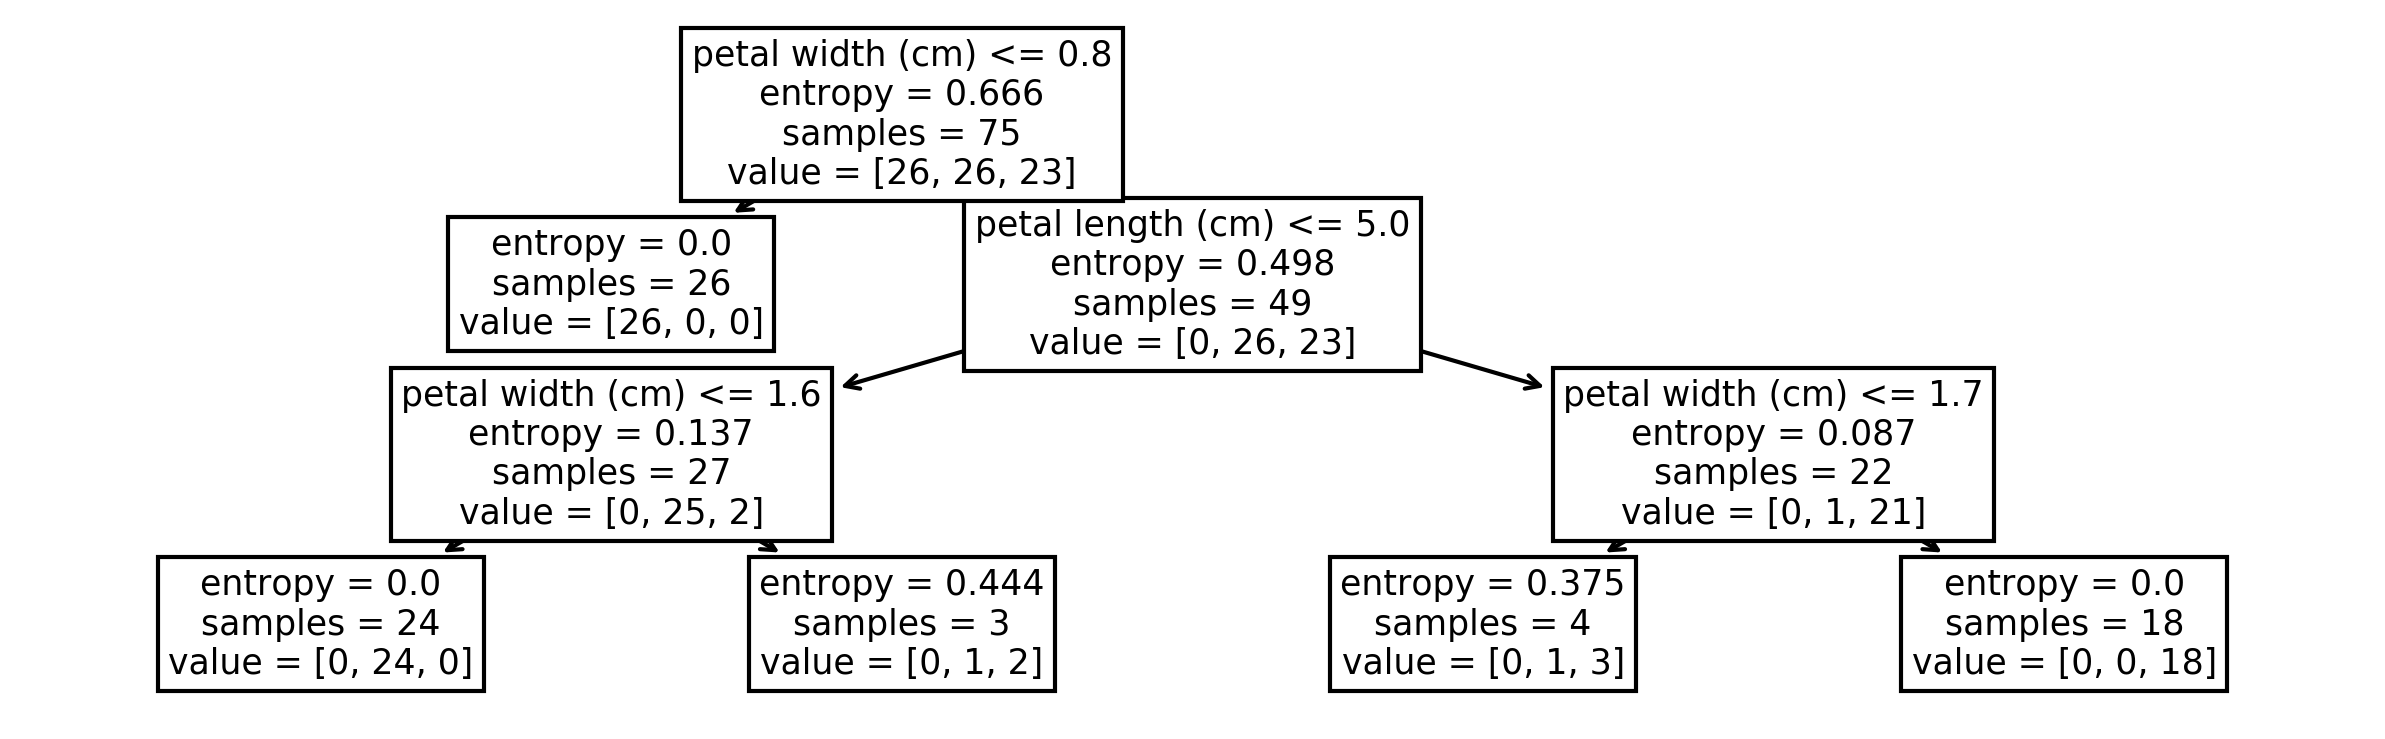

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(clf, feature_names=iris.feature_names)
plt.show()

## Load and process text data

In [71]:
sms = pd.read_table("data/sms.tsv", header=None, names=['label', 'message'])

# examine the shape
sms.shape

C:\Users\chenz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


(5572, 2)

In [72]:
# examine the first 10 rows
sms.head(10)

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

In [74]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

sms.head(10)

label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0
5  spam  FreeMsg Hey there darling it's been 3 week's n...          1
6   ham  Even my brother is not like to speak with me. ...          0
7   ham  As per your request 'Melle Melle (Oru Minnamin...          0
8  spam  WINNER!! As a valued network customer you have...          1
9  spam  Had your mobile 11 months or more? U R entitle...          1

In [75]:
# required way to define X and y for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [76]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)


# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [77]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

## Building a Decision Tree model

In [78]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
%time dt.fit(X_train_dtm,Y_train)

Wall time: 25.6 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(Y_test, y_pred_class))

# print the confusion matrix
print(metrics.confusion_matrix(Y_test, y_pred_class))

0.9361091170136396
[[1162   46]
 [  43  142]]


## LSA with Decision Tree

In [80]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300)

X_train_lsa = svd.fit_transform(X_train_dtm)
X_test_lsa = svd.transform(X_test_dtm)

In [81]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
%time dt.fit(X_train_lsa,Y_train)

Wall time: 695 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
y_pred_class = dt.predict(X_test_lsa)

print(metrics.accuracy_score(Y_test, y_pred_class))

print(metrics.confusion_matrix(Y_test, y_pred_class))

0.9389806173725772
[[1184   24]
 [  61  124]]


# Ensemble learning for text classification

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_features="auto",random_state=0)
rf.fit(X_train_lsa,Y_train)
y_pred = rf.predict(X_test_lsa)
print('RF accuracy: ',accuracy_score(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))
    
# Fit a AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(X_train_lsa,Y_train)
y_pred = adaboost.predict(X_test_lsa)
print('AdaBoost accuracy: ',accuracy_score(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

RF accuracy:  0.9526202440775305
[[1207    1]
 [  65  120]]
AdaBoost accuracy:  0.9605168700646087
[[1192   16]
 [  39  146]]
